## Naive Bayes using PCA on iris dataset.

In [38]:
from sklearn import datasets
from matplotlib import pyplot as plt

In [39]:
data = datasets.load_iris()

In [40]:
X = data.data
Y = data.target

In [41]:
X.shape,Y.shape

((150, 4), (150,))

### Reducing from 4 to 3

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=47)
pca = decomposition.PCA(n_components=3)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print(gnb.score(X_test_pca,y_test)*100) # We obtained 96.67% accuracy by using PCA. now demonstrating without PCA.
y_pred = gnb.predict(X_test_pca)
print("Precision is: ",precision_score(y_test,y_pred,average="weighted"))
print("Recall is: ",recall_score(y_test,y_pred,average="weighted"))

(3, 4)
(120, 3) (30, 3)
96.66666666666667
Precision is:  0.9708333333333333
Recall is:  0.9666666666666667


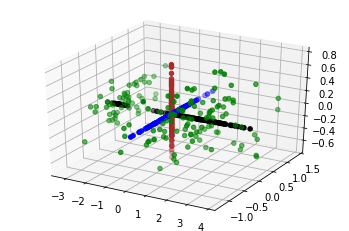

In [43]:
ax = plt.axes(projection='3d')
ax.scatter(np.zeros(len(X_trns[:,2])),np.zeros(len(X_trns[:,2])),X_trns[:,2],c="brown")
ax.scatter(X_trns[:,:1], np.zeros(len(X_trns[:,:1])), np.zeros(len(X_trns[:,:1])),c="black")
ax.scatter(np.zeros(len(X_trns[:,1:2])),X_trns[:,1:2],np.zeros(len(X_trns[:,1:2])),c="blue")
ax.scatter(X_trns[:,:1],X_trns[:,1:2],X_trns[:,2],c='g')

### Reducing from 4 to 2

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=47)
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print("Accuracy is: ",gnb.score(X_test_pca,y_test)*100) # We obtained 96.67% accuracy by using PCA. now demonstrating without PCA.
from sklearn.metrics import precision_score,recall_score
y_pred = gnb.predict(X_test_pca)
print("Precision is: ",precision_score(y_test,y_pred,average="weighted"))
print("Recall is: ",recall_score(y_test,y_pred,average="weighted"))

(2, 4)
(120, 2) (30, 2)
Accuracy is:  90.0
Precision is:  0.9299999999999999
Recall is:  0.9


Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
Eigenvalues or explained variance
[4.22824171 0.24267075]
150


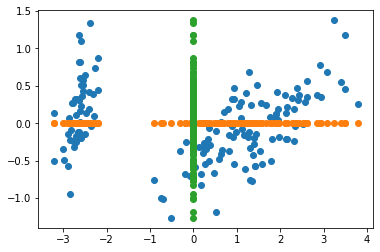

In [45]:
# Visualizing in 2D 
import matplotlib.pyplot as plt
from sklearn import decomposition
import numpy as np
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_trns = pca.transform(X)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pca.components_)
print('Eigenvalues or explained variance')
print(pca.explained_variance_)
plt.scatter(X_trns[:,:1],X_trns[:,1:2])
plt.scatter(X_trns[:,:1], np.zeros(len(X_trns[:,:1])))
plt.scatter(np.zeros(len(X_trns[:,1:2])),X_trns[:,1:2])
print(len(X_trns[:,:1]))

### Now we reduce from 4 to 1


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=47)
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print("Accuracy is: ",gnb.score(X_test_pca,y_test)*100) # We obtained 96.67% accuracy by using PCA. now demonstrating without PCA.
from sklearn.metrics import precision_score,recall_score
y_pred = gnb.predict(X_test_pca)
print("Precision is: ",precision_score(y_test,y_pred,average="weighted"))
print("Recall is: ",recall_score(y_test,y_pred,average="weighted"))

(1, 4)
(120, 1) (30, 1)
Accuracy is:  90.0
Precision is:  0.9299999999999999
Recall is:  0.9


## Naive Bayes Without PCA

In [47]:
X = data.data
Y = data.target

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=47)

In [49]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
gnb.score(X_test,y_test)*100

96.66666666666667

In [51]:
from sklearn.metrics import precision_score,recall_score
y_pred = gnb.predict(X_test)
print("Precision is: ",precision_score(y_test,y_pred,average="weighted"))
print("Recall is: ",recall_score(y_test,y_pred,average="weighted"))

Precision is:  0.9708333333333333
Recall is:  0.9666666666666667


## As we can see we obtain same result from using n_components=3 and n_component=4 (original) hence PCA is useful for dimensionality reduction.